In [5]:
import pandas as pd

In [6]:
fich=pd.read_csv("C:/Users/Malek/Desktop/4TWIN/DataMining/TP/CH3-ACP/cancer_reg.csv",header=0,sep =',')

In [7]:
fich.head

<bound method NDFrame.head of       avganncount  avgdeathsperyear  target_deathrate  incidencerate  \
0     1397.000000               469             164.9     489.800000   
1      173.000000                70             161.3     411.600000   
2      102.000000                50             174.7     349.700000   
3      427.000000               202             194.8     430.400000   
4       57.000000                26             144.4     350.100000   
...           ...               ...               ...            ...   
3042  1962.667684                15             149.6     453.549422   
3043  1962.667684                43             150.1     453.549422   
3044  1962.667684                46             153.9     453.549422   
3045  1962.667684                52             175.0     453.549422   
3046  1962.667684                48             213.6     453.549422   

      medincome  popest2015  povertypercent  studypercap           binnedinc  \
0         61898      2601

In [8]:
fich.iloc[:7,:15]

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,medianagefemale,geography,percentmarried,pctnohs18_24
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",52.5,11.5
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",44.5,6.1
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",54.2,24.0
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",52.7,20.2
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",57.8,14.9
5,428.0,152,176.0,505.4,52313,61023,15.6,180.259902,"(51046.4, 54545.6]",45.4,43.5,48.0,"Mason County, Washington",50.4,29.9
6,250.0,97,175.9,461.8,37782,41516,23.2,0.000000,"(37413.8, 40362.7]",42.6,42.2,43.5,"Okanogan County, Washington",54.1,26.1


In [9]:
fich.shape

(3047, 33)

In [10]:
data=fich.drop(['binnedinc', 'geography'], axis=1)

In [11]:
data.shape

(3047, 31)

In [12]:
data1=data.iloc[:13,:14]
data1.shape

(13, 14)

In [13]:
data1.head(2)

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,percentmarried,pctnohs18_24,pcths18_24
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,41.7,52.5,11.5,39.5
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,33.7,44.5,6.1,22.4


In [14]:
print(data1.shape)

(13, 14)


In [15]:
import sklearn.preprocessing as skp
scaler=skp.StandardScaler()
scaler.fit(data1)
X=scaler.fit_transform(data1)

In [16]:
X[0,:]

array([ 0.74537686,  0.69445226, -0.33015767,  0.98599705,  1.76794647,
        0.64498473, -1.30217495,  1.2388781 , -0.83081364, -1.04620655,
       -0.6083585 , -0.16686079, -1.25330041,  0.48776575])

In [18]:
from sklearn.decomposition import PCA
#n_components=2
pca = PCA(n_components=2)
pca.fit(X)
print(pca)
print(X.shape)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
(13, 14)


(13, 2)


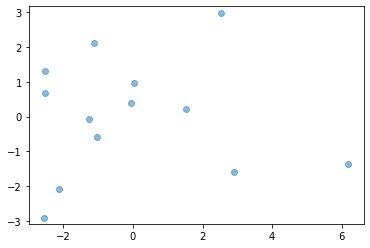

In [16]:
import matplotlib.pyplot as plt
X_new = pca.fit_transform(X)
print(X_new.shape)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.5)
#plt.scatter(X[:, 2], X[:, 3], alpha=0.8)
plt.axis('equal');
plt.show()

In [17]:
pca.n_components_

2

In [18]:
pca.explained_variance_

array([6.89921119, 2.84099174])

explained_variance_ratio_:Percentage of variance explained by each of the selected components

In [19]:
pca.explained_variance_ratio_

array([0.45489305, 0.18731814])

singular_values_:are the square roots of the eigenvalues 

In [20]:
pca.singular_values_

array([9.09893039, 5.83882701])

13


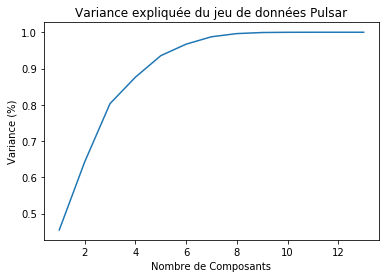

In [20]:
import matplotlib.pyplot as plt
import numpy as np
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X)
print(len(pca.explained_variance_ratio_))
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
XX=[1,2,3,4,5,6,7,8,9,10,11,12,13]
plt.plot(XX,np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nombre de Composants')
plt.ylabel('Variance (%)') #for each component
plt.title('Variance expliquée du jeu de données Pulsar')
plt.show()

les étapes de réalisation de l'acp

In [22]:
#data_mean = np.mean(X)

In [23]:
X.shape

(13, 14)

In [24]:
data_center = X 

In [25]:
data_center.T.shape

(14, 13)

In [26]:
cov_matrix = np.cov(data_center.T)

In [27]:
cov_matrix.shape

(14, 14)

In [28]:
eigenval, eigenvec = np.linalg.eig(cov_matrix)

In [29]:
print(eigenval.shape)

(14,)


In [30]:
print(eigenvec.shape)

(14, 14)


In [35]:
significance = [np.abs(i)*100/14 for i in eigenval]
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
XX.append(14)
plt.plot(YY, np.cumsum(significance))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

NameError: name 'YY' is not defined

<Figure size 432x288 with 0 Axes>

In [36]:
X1=np.matmul(X,eigenvec[:,:2])

In [37]:
print(X1)

[[ 2.89881634  1.57844516]
 [ 2.52312324 -2.98610752]
 [-1.2546327   0.07141027]
 [ 0.0203784  -0.96709809]
 [-2.11052472  2.09347053]
 [-0.05745116 -0.37938465]
 [-1.11369017 -2.09908713]
 [-2.5315013  -0.67405984]
 [-2.51120547 -1.29616492]
 [ 6.18462092  1.36608654]
 [-2.53855505  2.90032646]
 [ 1.51416928 -0.20460217]
 [-1.0235476   0.59676536]]


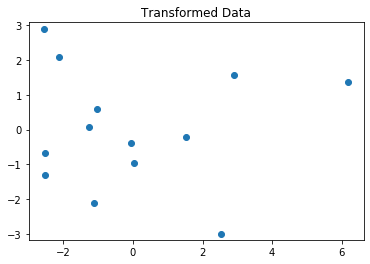

In [38]:
plt.scatter(X1[:, 0], X1[:, 1])
plt.title('Transformed Data')
plt.axis('equal')
plt.show()

contribution de chaque individu à la formation de l'axe
project_sur_composante_k_de_i^2/n*lamda_K

![title](formule_pca1.png)

In [41]:
ctr = X1**2
for j in range(2):
    ctr[:,j] = ctr[:,j]/(13*eigenval[j])
new_pd=pd.DataFrame({'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})
print(new_pd)

                          CTR_1                        CTR_2
0      (0.09369115874996246-0j)     (0.06745989665833436-0j)
1      (0.07097969593498019-0j)      (0.2414335164127048+0j)
2     (0.017550537143911246+0j)  (0.00013807276875642808-0j)
3    (4.630172547824923e-06-0j)    (0.025323732982450484+0j)
4      (0.04966358837411055+0j)     (0.11866438185205995-0j)
5   (3.6800590276037616e-05+0j)   (0.0038971416905981496+0j)
6     (0.013828847289819906+0j)      (0.1193019680311916+0j)
7      (0.07145185655328452+0j)    (0.012302222772633199+0j)
8       (0.0703107461672563+0j)    (0.045489085055491194+0j)
9       (0.4264649846050536-0j)    (0.050529279134164475-0j)
10     (0.07185059699261637+0j)      (0.2277615689781384-0j)
11     (0.02556266149556598-0j)    (0.001133462499468147+0j)
12    (0.011680819007538585+0j)    (0.009642594240931357-0j)


la projection des variables sur les axes est comme suis: matrice Vecteur propre x racine(matrice des vecteurs propres diagonale))

In [42]:
#préparation de la projection des variables et la création du cercle de corrélation
#corrélation des variables avec les axes
sqrt_eigval = np.sqrt(eigenval)
print(sqrt_eigval.shape)
corvar = np.zeros((14,14))
for k in range(14):
    #print(pca.components_[k,:].shape)
    #p1=np.reshape(pca.components_[k,:],(14,1))
    corvar[:,k] = eigenvec[:,k] * sqrt_eigval[k]
    

#afficher la matrice des corrélations variables x facteurs
print(corvar.shape)


(14,)
(14, 14)


C:\Users\esprit\Anaconda3_5.0.1\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


In [43]:
print(pd.DataFrame({'id':data1.columns,'proj_1':corvar[:,0],'proj_2':corvar[:,1]}))

                  id    proj_1    proj_2
0        avganncount -0.878199 -0.292829
1   avgdeathsperyear -0.878951 -0.276197
2   target_deathrate -0.125373  0.589961
3      incidencerate -0.612290  0.102697
4          medincome -0.638154 -0.714465
5         popest2015 -0.871565 -0.286323
6     povertypercent  0.289473  0.867921
7        studypercap -0.661396 -0.141708
8          medianage  0.904007 -0.393074
9      medianagemale  0.919486 -0.369962
10   medianagefemale  0.876700 -0.411414
11    percentmarried  0.686863 -0.570573
12      pctnohs18_24  0.540945  0.239293
13        pcths18_24  0.284624 -0.333308


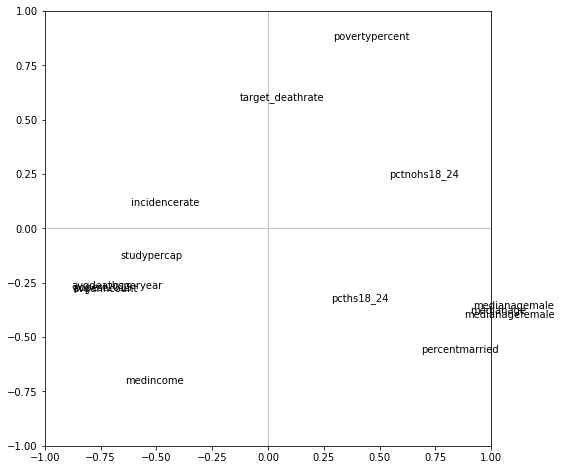

In [47]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(14):
    plt.annotate(data1.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
plt.show()